### Noteboook para pré-processamento

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/sea-building-energy-benchmarking/2016-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/socrata_metadata_2016-building-energy-benchmarking.json
/kaggle/input/sea-building-energy-benchmarking/2015-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/socrata_metadata_2015-building-energy-benchmarking.json


In [2]:
#Mostrar todas as colunas com o comando head
pd.set_option('display.max_columns',42)
dados = pd.read_csv('/kaggle/input/sea-building-energy-benchmarking/2015-building-energy-benchmarking.csv')
dados.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,...,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,...,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,...,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,...,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,...,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
#Ver o tipo das variáveis
dados.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [4]:
#Transformando uma um tipo de variável em outra em outra

dados['DataYear'] = dados['DataYear'].astype(int)

In [5]:
#Ver os dados faltantes
faltantes = dados.isnull( ).sum()
print(faltantes)

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

In [6]:
#Em porcentagem
faltantes_per100 = (dados.isnull( ).sum())/len(dados['OSEBuildingID'])*100
print(faltantes_per100)

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

É possível ver que temos várias colunas com mais de 80% dos dados missing, essas colunas poderíamos trabalhar com o descarte delas, utilizando a função dropna(), mas neste primeiro momento só vamos nos preocupar com a variável ENERGYSTARScore , onde vamos transformar todos os valoreses que são NaN pela média desta variável.

In [7]:
dados['ENERGYSTARScore'] = dados['ENERGYSTARScore'].fillna(dados['ENERGYSTARScore'].median())

In [8]:
faltantes = dados.isnull( ).sum()
print(faltantes)

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

### Medindo a correlação

In [9]:
#Este comando aumeta o número de caracteres a ser exibido nas colunas antes de truncá-las
pd.set_option('display.width',320)

#Comando de correlação
print(dados.corr(method = 'pearson',numeric_only = True))

                                                    OSEBuildingID  DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
OSEBuildingID                                            1.000000       NaN            -0.092519   0.134578          -0.000676       -0.113519         -0.268611           -0.179414               -0.261334                  -0.252482                        -0.223600                       -0.180031         0.062113   
DataYear                                                      NaN       NaN                  NaN        NaN                NaN             NaN               NaN                 NaN                     NaN                        NaN                              NaN                             NaN              NaN   
CouncilDistrictCode                              

### Exibindo a correlação em um HeatMap

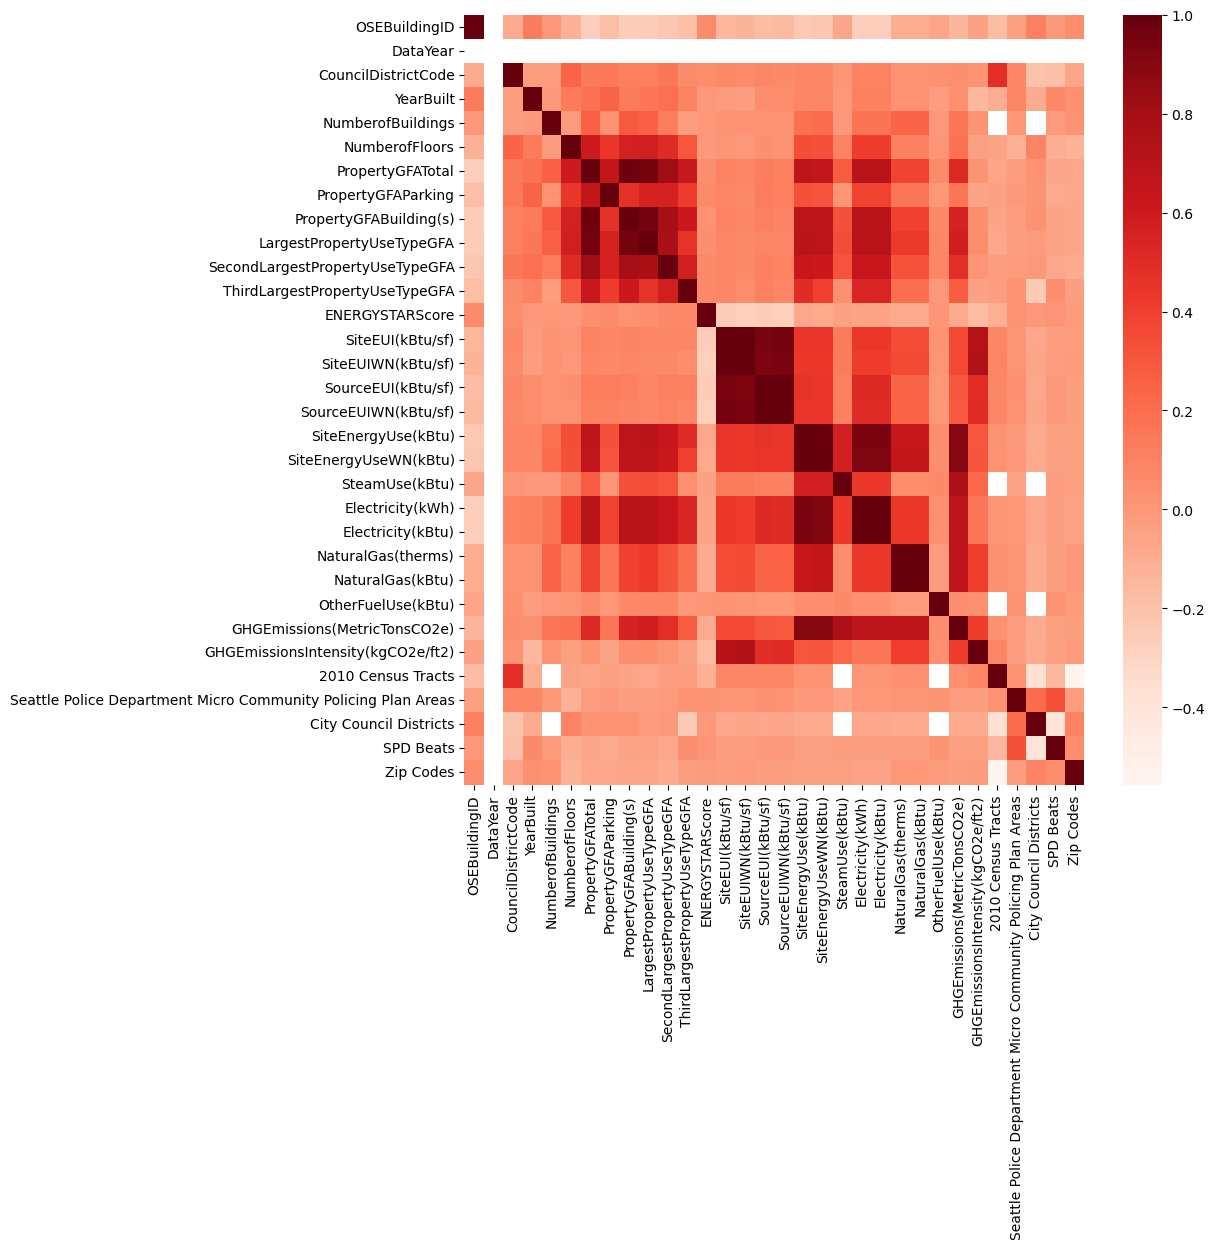

In [10]:
# Tamanho do gráfico
plt.figure(figsize=(10,10))

#HeatMap
sns.heatmap(dados.corr(numeric_only = True),cmap='Reds')
plt.show()